# Exploration: positives time series

Now I'm analyzing positives respect to their date recorded.

In [ ]:
# %load_ext autoreload
# %autoreload 2

In [ ]:
#libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_positives = pd.read_csv('/work/covid-19-EC-provinces/data/interim/positives.csv')

In [ ]:
df_positives.sample(5)

,created_at,provincia,poblacion,total,nuevas,lat,lng,year,month,day,day_of_week,quarter
14717,2021-11-16,Cotopaxi,488716,12267,6,-0.933333,-78.616667,2021,11,16,1,4
2583,2020-06-28,Napo,133705,564,8,-0.989000,-77.815900,2020,6,28,6,2
6285,2020-11-29,Sucumbíos,230503,2893,2,0.084722,-76.882778,2020,11,29,6,4
14220,2021-10-26,Los Ríos,921763,13175,3,-1.800000,-79.533333,2021,10,26,1,4
7886,2021-02-04,Morona Santiago,196535,4207,2,-2.300000,-78.116667,2021,2,4,3,1


In [ ]:
df_positives.columns

Index(['created_at', 'provincia', 'poblacion', 'total', 'nuevas', 'lat', 'lng',
       'year', 'month', 'day', 'day_of_week', 'quarter'],
      dtype='object')

In [ ]:
df_positives.created_at = pd.to_datetime(df_positives.created_at, format='%Y/%m/%d')

In [ ]:
df_positives.set_index('created_at', inplace=True)

In [ ]:
df_positives.head()

,provincia,poblacion,total,nuevas,lat,lng,year,month,day,day_of_week,quarter
created_at,,,,,,,,,,,
2020-03-13,Azuay,881394,0,0,-2.897414,-79.004481,2020,3,13,4,1
2020-03-13,Bolívar,209933,0,0,-1.605556,-79.003056,2020,3,13,4,1
2020-03-13,Carchi,186869,0,0,0.812180,-77.716330,2020,3,13,4,1
2020-03-13,Cañar,281396,0,0,-2.733333,-78.833333,2020,3,13,4,1
2020-03-13,Chimborazo,524004,0,0,-1.674347,-78.648294,2020,3,13,4,1


In [ ]:
df_positives.index.min()

Timestamp('2020-03-13 00:00:00')

In [ ]:
sns.set_theme()

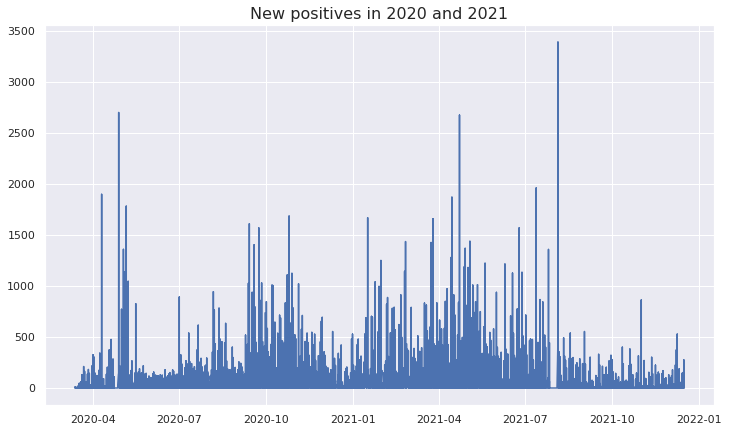

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_positives.index, df_positives['nuevas'])
plt.title('New positives in 2020 and 2021', size=16)
plt.show()

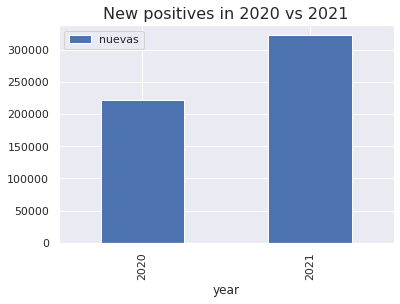

In [ ]:
df_positives.groupby('year')[['nuevas']].sum().plot.bar()
plt.title('New positives in 2020 vs 2021', size=16)
plt.show()

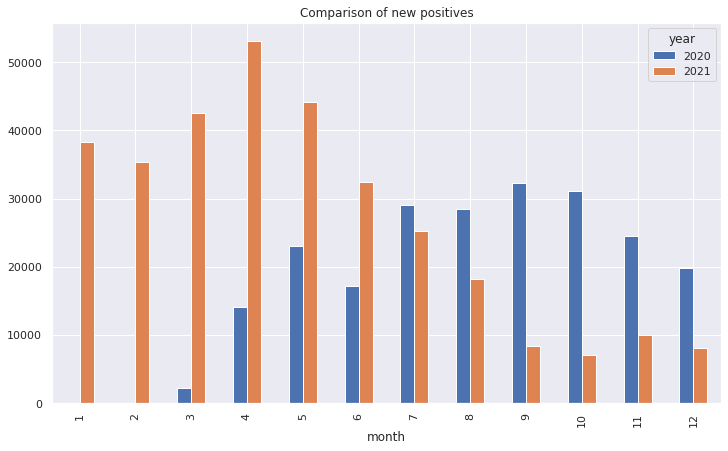

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
pd.pivot_table(df_positives.groupby(['year', 'month'])[['nuevas']].sum().reset_index(), 
values='nuevas', index='month', columns='year').plot.bar(ax=ax)
plt.title('Comparison of new positives')
plt.show()

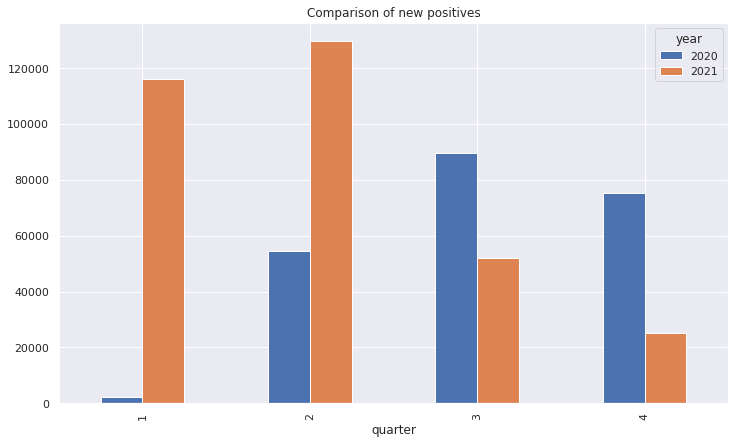

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
pd.pivot_table(df_positives.groupby(['year', 'quarter'])[['nuevas']].sum().reset_index(), 
values='nuevas', index='quarter', columns='year').plot.bar(ax=ax)
plt.title('Comparison of new positives')
plt.show()

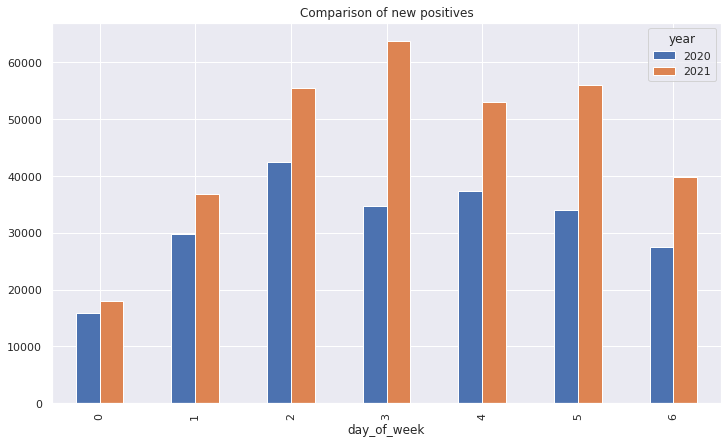

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
pd.pivot_table(df_positives.groupby(['year', 'day_of_week'])[['nuevas']].sum().reset_index(), 
values='nuevas', index='day_of_week', columns='year').plot.bar(ax=ax)
plt.title('Comparison of new positives')
plt.show()

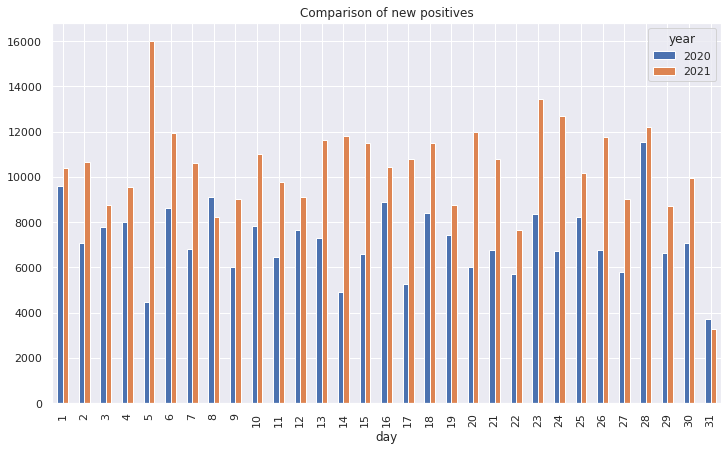

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
pd.pivot_table(df_positives.groupby(['year', 'day'])[['nuevas']].sum().reset_index(), 
values='nuevas', index='day', columns='year').plot.bar(ax=ax)
plt.title('Comparison of new positives')
plt.show()

So far, visualizations tell us:

* Durig the first half of 2021 contagions reached record-highs.
* During 2020, the last months had more contagions.
* While since July contagions began to reduce, it's november when contagions are increasing again. But numbers are not as high as before July. LOOK OUT.
* We may say that holidays made contagions increase. But we'll investigate that later.

We need more information related to bed availability and vaccionations.

In [ ]:
df_positives.query('quarter >= 3 and year == 2020')

,provincia,poblacion,total,nuevas,lat,lng,year,month,day,day_of_week,quarter
created_at,,,,,,,,,,,
2020-07-01,Azuay,881394,1791,29,-2.897414,-79.004481,2020,7,1,2,3
2020-07-01,Bolívar,209933,654,6,-1.605556,-79.003056,2020,7,1,2,3
2020-07-01,Carchi,186869,303,1,0.812180,-77.716330,2020,7,1,2,3
2020-07-01,Cañar,281396,545,3,-2.733333,-78.833333,2020,7,1,2,3
2020-07-01,Chimborazo,524004,777,4,-1.674347,-78.648294,2020,7,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,Santa Elena,401178,2631,12,-2.226700,-80.858300,2020,12,31,3,4
2020-12-31,Sto. Domingo Tsáchilas,511151,5914,41,-0.254167,-79.171944,2020,12,31,3,4
2020-12-31,Sucumbíos,230503,3009,1,0.084722,-76.882778,2020,12,31,3,4


In [ ]:
df_positives.query('quarter <= 2 and year == 2021')

,provincia,poblacion,total,nuevas,lat,lng,year,month,day,day_of_week,quarter
created_at,,,,,,,,,,,
2021-01-01,Azuay,881394,13605,48,-2.897414,-79.004481,2021,1,1,4,1
2021-01-01,Bolívar,209933,2531,4,-1.605556,-79.003056,2021,1,1,4,1
2021-01-01,Carchi,186869,3667,38,0.812180,-77.716330,2021,1,1,4,1
2021-01-01,Cañar,281396,2849,45,-2.733333,-78.833333,2021,1,1,4,1
2021-01-01,Chimborazo,524004,3260,7,-1.674347,-78.648294,2021,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,Santa Elena,401178,4406,2,-2.226700,-80.858300,2021,6,30,2,2
2021-06-30,Sto. Domingo Tsáchilas,511151,11556,3,-0.254167,-79.171944,2021,6,30,2,2
2021-06-30,Sucumbíos,230503,5411,2,0.084722,-76.882778,2021,6,30,2,2


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7294ef23-3287-47ac-a12f-ba892bffdf3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>